In [2]:
from sis_methods import *
from sir_methods import *
from vote_methods import *

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

## P11.1 Erdős-Rényi (2P)

Computed R0 = 19.98
Mean-field steady state fraction (infected) = 0.94994994994995
Mean-field steady state fraction (susceptible) = 0.05005005005005003


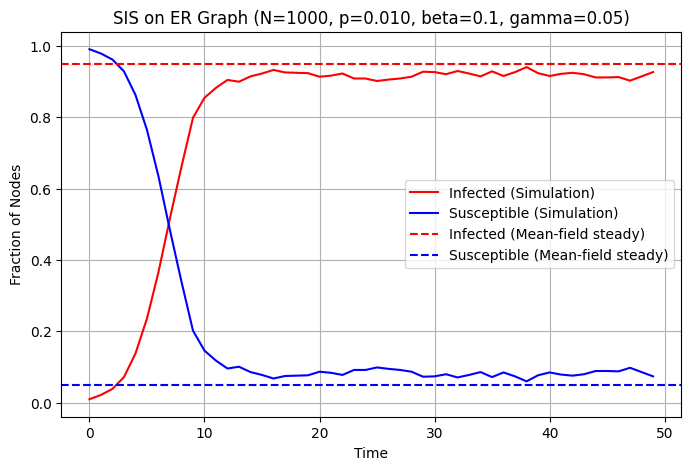

In [11]:
# params
N = 1000
p = 0.01
beta = 0.10
gamma = 0.05
initial_infected_fraction = 0.01
max_time = 50
seed = 42

# simulation
infected_fraction_series, susceptible_fraction_series = run_sis_simulation_er(
    N=N, 
    p=p, 
    beta=beta, 
    gamma=gamma, 
    initial_infected_fraction=initial_infected_fraction, 
    max_time=max_time, 
    seed=seed
)

# theoretical R0
avg_degree = p * (N - 1)  # approximate average degree
R0 = beta * avg_degree / gamma
print("Computed R0 =", R0)



if R0 > 1.0:
    rho_star = 1 - 1/R0
else:
    rho_star = 0.0
print("Mean-field steady state fraction (infected) =", rho_star)

# Susceptible steady-state (approx.) for mean-field
sigma_star = 1 - rho_star
print("Mean-field steady state fraction (susceptible) =", sigma_star)


#plot
plt.figure(figsize=(8,5))
plt.plot(infected_fraction_series, label="Infected (Simulation)", color='r')
plt.plot(susceptible_fraction_series, label="Susceptible (Simulation)", color='b')

# Plot the mean-field lines if R0 > 1
if rho_star > 0:
    plt.axhline(y=rho_star, color='r', linestyle='--', label="Infected (Mean-field steady)")
    plt.axhline(y=sigma_star, color='b', linestyle='--', label="Susceptible (Mean-field steady)")

plt.title(f"SIS on ER Graph (N={N}, p={p:.3f}, beta={beta}, gamma={gamma})")
plt.xlabel("Time")
plt.ylabel("Fraction of Nodes")
plt.legend()
plt.grid(True)
plt.show()


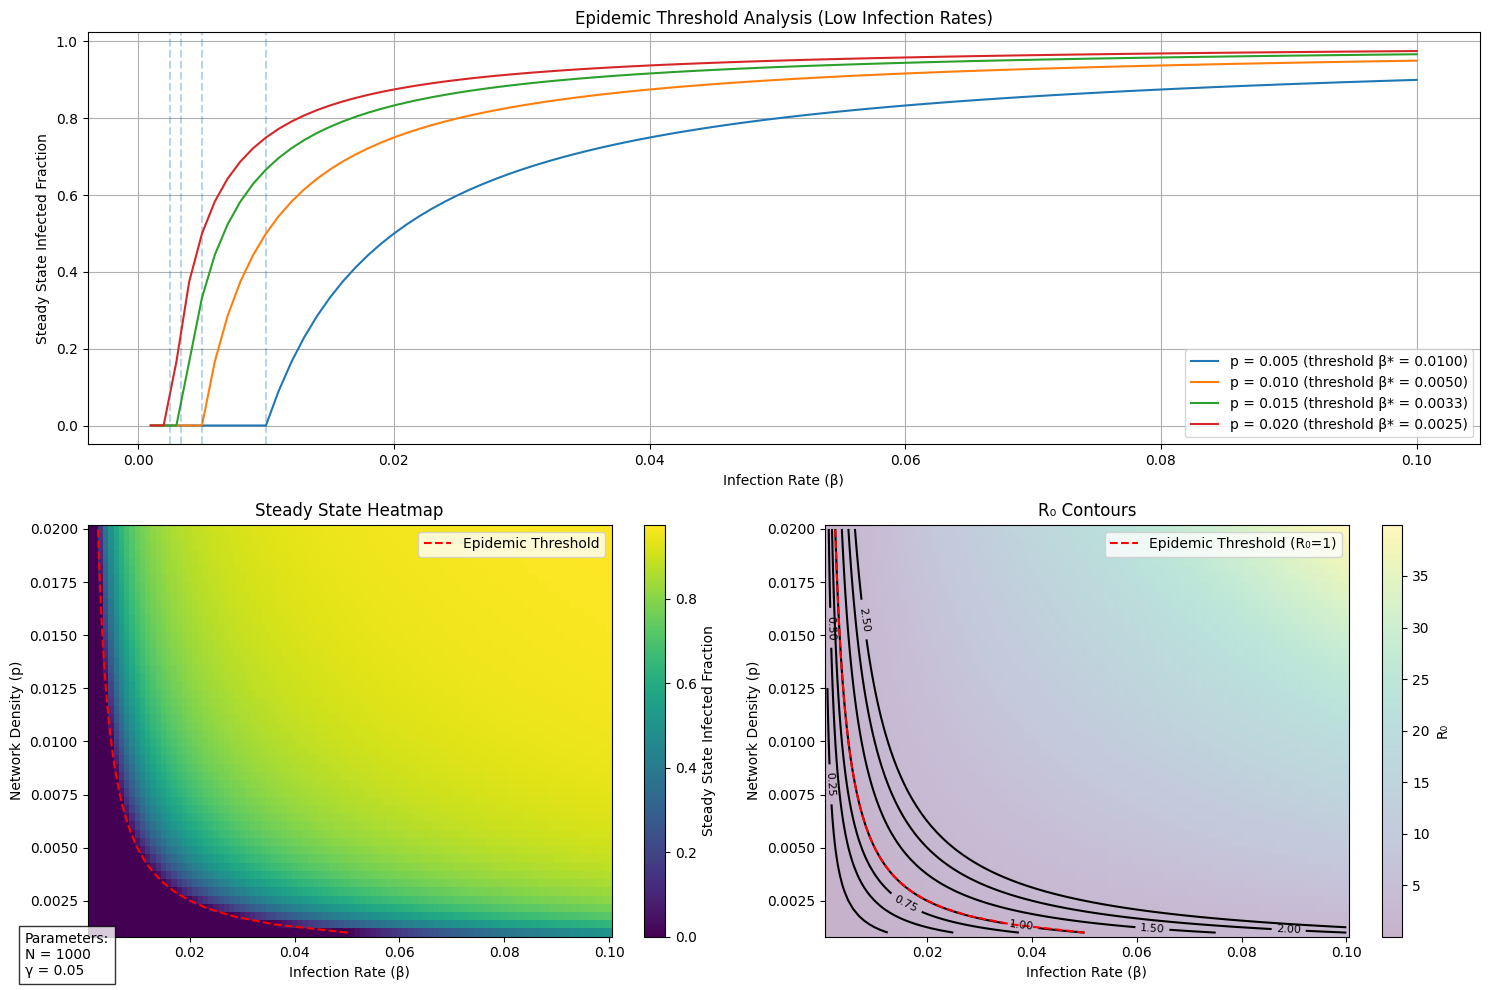

In [9]:
from matplotlib.gridspec import GridSpec

def calculate_steady_state(N, p, beta, gamma):
    avg_degree = p * (N - 1)
    R0 = beta * avg_degree / gamma
    rho_star = 1 - 1/R0 if R0 > 1 else 0
    return rho_star

def calculate_threshold(N, p, gamma):
    avg_degree = p * (N - 1)
    return gamma / avg_degree

def plot_epidemic_threshold():
    N = 1000
    gamma = 0.05
    p_values = np.linspace(0.001, 0.02, 50) 
    beta_values = np.linspace(0.001, 0.1, 100) 

    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])

    # Plot 1
    selected_p_values = [0.005, 0.01, 0.015, 0.02]
    for p in selected_p_values:
        steady_states = [calculate_steady_state(N, p, beta, gamma) for beta in beta_values]
        threshold = calculate_threshold(N, p, gamma)
        
        ax1.plot(beta_values, steady_states, 
                label=f'p = {p:.3f} (threshold β* = {threshold:.4f})')
        ax1.axvline(x=threshold, linestyle='--', alpha=0.3)

    ax1.set_xlabel('Infection Rate (β)')
    ax1.set_ylabel('Steady State Infected Fraction')
    ax1.set_title('Epidemic Threshold Analysis (Low Infection Rates)')
    ax1.grid(True)
    ax1.legend()

    # Plot 2
    X, Y = np.meshgrid(beta_values, p_values)
    Z = np.zeros_like(X)
    for i, p in enumerate(p_values):
        for j, beta in enumerate(beta_values):
            Z[i,j] = calculate_steady_state(N, p, beta, gamma)

    im = ax2.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
    plt.colorbar(im, ax=ax2, label='Steady State Infected Fraction')
    
    threshold_betas = [calculate_threshold(N, p, gamma) for p in p_values]
    ax2.plot(threshold_betas, p_values, 'r--', label='Epidemic Threshold')
    
    ax2.set_xlabel('Infection Rate (β)')
    ax2.set_ylabel('Network Density (p)')
    ax2.set_title('Steady State Heatmap')
    ax2.legend()

    # Plot 3
    Z_R0 = np.zeros_like(X)
    for i, p in enumerate(p_values):
        avg_degree = p * (N - 1)
        for j, beta in enumerate(beta_values):
            R0 = beta * avg_degree / gamma
            Z_R0[i,j] = R0

    levels = [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5]  
    cs = ax3.contour(X, Y, Z_R0, levels=levels, colors='black')
    ax3.clabel(cs, inline=True, fontsize=8)
    im = ax3.pcolormesh(X, Y, Z_R0, shading='auto', cmap='viridis', alpha=0.3)
    plt.colorbar(im, ax=ax3, label='R₀')
    
    ax3.plot(threshold_betas, p_values, 'r--', label='Epidemic Threshold (R₀=1)')
    
    ax3.set_xlabel('Infection Rate (β)')
    ax3.set_ylabel('Network Density (p)')
    ax3.set_title('R₀ Contours')
    ax3.legend()


    fig.text(0.02, 0.02, f'Parameters:\nN = {N}\nγ = {gamma}', 
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()


plot_epidemic_threshold()

## P11.2 Barabasi-Albert (2P)

Naive R0 (mean-field) = 8.0
Mean-field steady state fraction (infected) = 0.875
Mean-field steady state fraction (susceptible) = 0.125


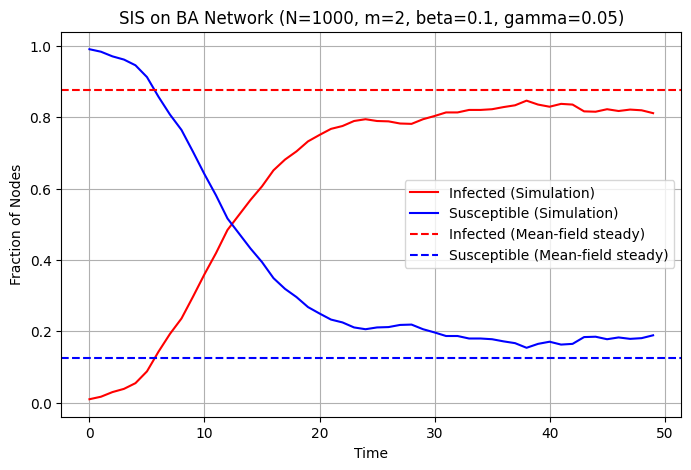

In [ ]:
N = 1000
m = 2
beta = 0.10
gamma = 0.05
initial_infected_fraction = 0.01
max_time = 50
seed = 42

# simulation
infected_fraction_series, susceptible_fraction_series = run_sis_simulation_ba(
    N=N, 
    m=m, 
    beta=beta, 
    gamma=gamma, 
    initial_infected_fraction=initial_infected_fraction, 
    max_time=max_time, 
    seed=seed
)

# naive R0
avg_degree = 2*m
R0 = (beta * avg_degree) / gamma
print("Naive R0 (mean-field) =", R0)

if R0 > 1.0:
    rho_star = 1 - 1/R0
else:
    rho_star = 0.0
print("Mean-field steady state fraction (infected) =", rho_star)

sigma_star = 1 - rho_star
print("Mean-field steady state fraction (susceptible) =", sigma_star)

# plot
plt.figure(figsize=(8,5))
plt.plot(infected_fraction_series, label="Infected (Simulation)", color='r')
plt.plot(susceptible_fraction_series, label="Susceptible (Simulation)", color='b')

if rho_star > 0:
    plt.axhline(y=rho_star, color='r', linestyle='--', 
                label="Infected (Mean-field steady)")
    plt.axhline(y=sigma_star, color='b', linestyle='--', 
                label="Susceptible (Mean-field steady)")

plt.title(f"SIS on BA Network (N={N}, m={m}, beta={beta}, gamma={gamma})")
plt.xlabel("Time")
plt.ylabel("Fraction of Nodes")
plt.legend()
plt.grid(True)
plt.show()

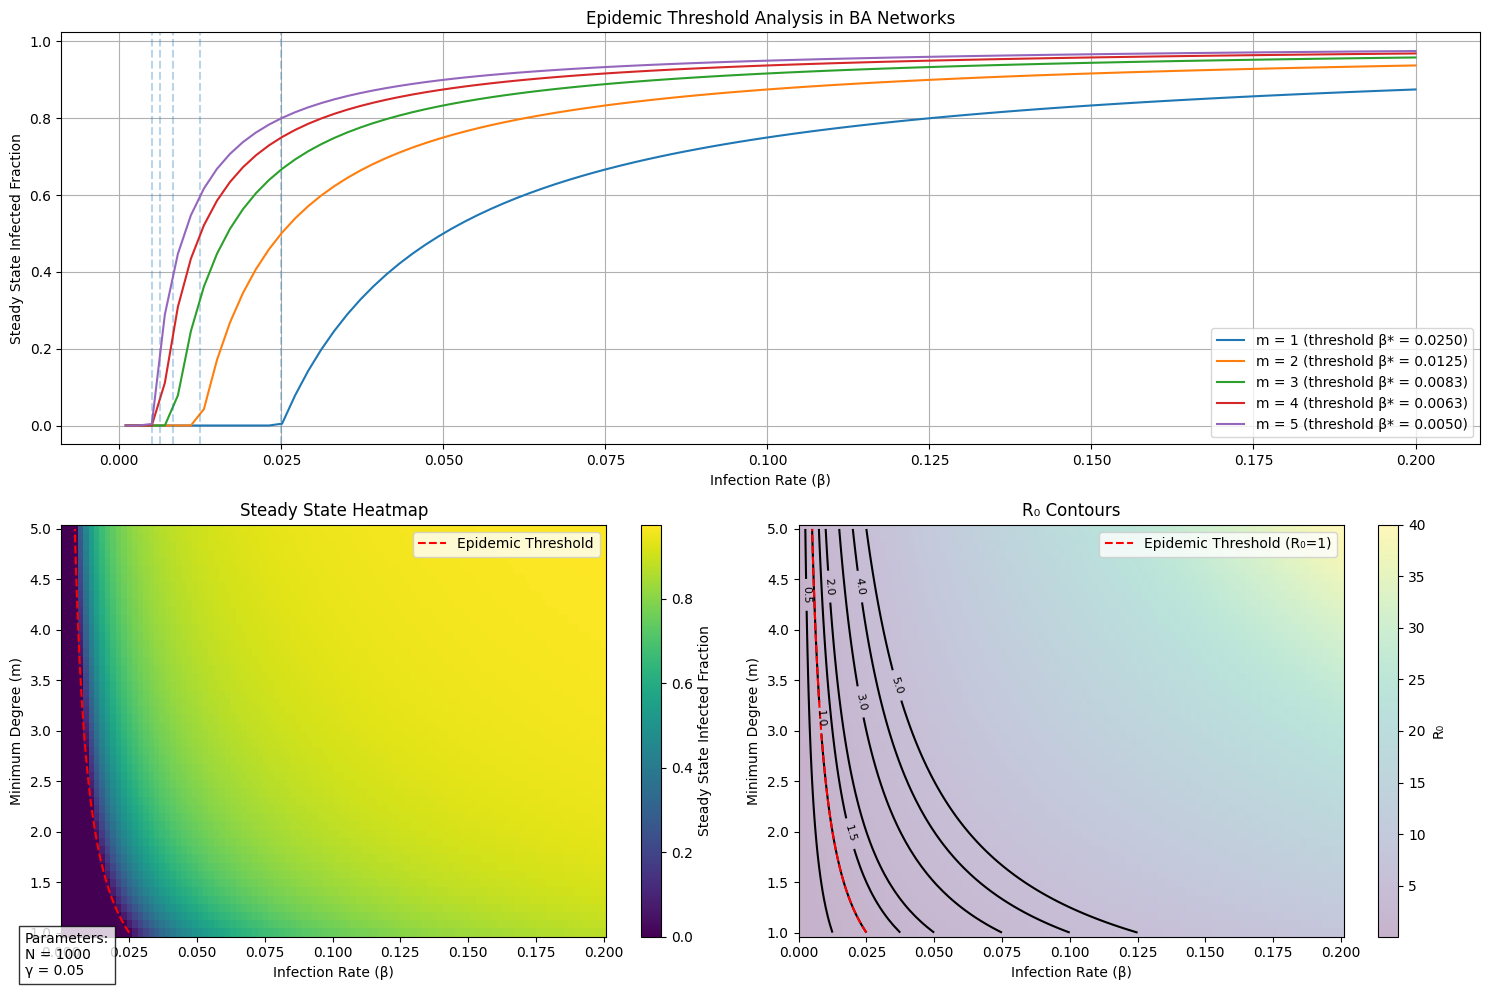

In [10]:
def calculate_steady_state(m, beta, gamma):
    avg_degree = 2 * m
    R0 = beta * avg_degree / gamma
    rho_star = 1 - 1/R0 if R0 > 1 else 0
    return rho_star

def calculate_threshold(m, gamma):
    avg_degree = 2 * m
    return gamma / avg_degree

def plot_ba_epidemic_threshold():
    N = 1000
    gamma = 0.05
    m_values = np.arange(1, 6)  
    beta_values = np.linspace(0.001, 0.2, 100)  

    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0, :])  
    ax2 = fig.add_subplot(gs[1, 0])   
    ax3 = fig.add_subplot(gs[1, 1])   

    # Plot 1
    for m in m_values:
        steady_states = [calculate_steady_state(m, beta, gamma) for beta in beta_values]
        threshold = calculate_threshold(m, gamma)
        
        ax1.plot(beta_values, steady_states, 
                label=f'm = {m} (threshold β* = {threshold:.4f})')
        ax1.axvline(x=threshold, linestyle='--', alpha=0.3)

    ax1.set_xlabel('Infection Rate (β)')
    ax1.set_ylabel('Steady State Infected Fraction')
    ax1.set_title('Epidemic Threshold Analysis in BA Networks')
    ax1.grid(True)
    ax1.legend()

    # Plot 2
    X, Y = np.meshgrid(beta_values, np.linspace(1, 5, 50))
    Z = np.zeros_like(X)
    for i, m in enumerate(np.linspace(1, 5, 50)):
        for j, beta in enumerate(beta_values):
            Z[i,j] = calculate_steady_state(m, beta, gamma)

    im = ax2.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
    plt.colorbar(im, ax=ax2, label='Steady State Infected Fraction')
    
    m_range = np.linspace(1, 5, 100)
    threshold_betas = [calculate_threshold(m, gamma) for m in m_range]
    ax2.plot(threshold_betas, m_range, 'r--', label='Epidemic Threshold')
    
    ax2.set_xlabel('Infection Rate (β)')
    ax2.set_ylabel('Minimum Degree (m)')
    ax2.set_title('Steady State Heatmap')
    ax2.legend()

    # Plot 3
    Z_R0 = np.zeros_like(X)
    for i, m in enumerate(np.linspace(1, 5, 50)):
        avg_degree = 2 * m
        for j, beta in enumerate(beta_values):
            R0 = beta * avg_degree / gamma
            Z_R0[i,j] = R0

    levels = [0.5, 1, 1.5, 2, 3, 4, 5]
    cs = ax3.contour(X, Y, Z_R0, levels=levels, colors='black')
    ax3.clabel(cs, inline=True, fontsize=8)
    im = ax3.pcolormesh(X, Y, Z_R0, shading='auto', cmap='viridis', alpha=0.3)
    plt.colorbar(im, ax=ax3, label='R₀')
    
    ax3.plot(threshold_betas, m_range, 'r--', label='Epidemic Threshold (R₀=1)')
    
    ax3.set_xlabel('Infection Rate (β)')
    ax3.set_ylabel('Minimum Degree (m)')
    ax3.set_title('R₀ Contours')
    ax3.legend()

    fig.text(0.02, 0.02, f'Parameters:\nN = {N}\nγ = {gamma}', 
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

plot_ba_epidemic_threshold()

## P11.3 different than SIS agent-based model (SIR)

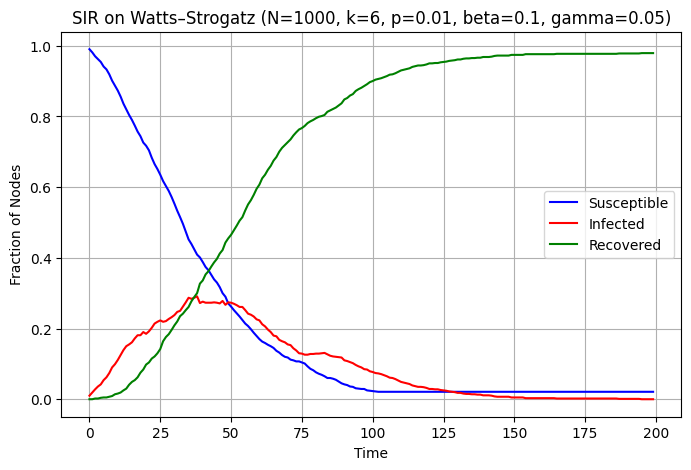

In [12]:
# params
N = 1000
k = 6
p = 0.01
beta = 0.10
gamma = 0.05
initial_infected_fraction = 0.01
max_time = 200
seed = 42

# simulation
S_series, I_series, R_series = run_sir_simulation_ws(
    N=N,
    k=k,
    p=p,
    beta=beta,
    gamma=gamma,
    initial_infected_fraction=initial_infected_fraction,
    max_time=max_time,
    seed=seed
)

# plot
plt.figure(figsize=(8,5))
plt.plot(S_series, label="Susceptible", color='blue')
plt.plot(I_series, label="Infected", color='red')
plt.plot(R_series, label="Recovered", color='green')
plt.title(f"SIR on Watts–Strogatz (N={N}, k={k}, p={p}, beta={beta}, gamma={gamma})")
plt.xlabel("Time")
plt.ylabel("Fraction of Nodes")
plt.legend()
plt.grid(True)
plt.show()


* Because recovered nodes cannot return to the susceptible state, the infected fraction eventually goes to zero
* I(t) rise initially and then fall back to zero.
* S(t) decreases monotonically (susceptibles are turning into infected or skip directly to recovered through infection and then recovery).
* R(t) increases over time, eventually plateauing once the epidemic can no longer spread.
* small-world network typically shortens path lengths and can facilitate a rapid spread of infection compared to a purely lattice-based 

## P11.4 Modify classical voter model (2P)

* Discrete opinions {−1,+1}.
* Propaganda effect: With probability α, an agent chooses to align with opinion = +1 (or  −1, your choice) due to external persuasion.
* Ideological inertia: Each agent has a probability k_i representing how stubborn it is—if a neighbor’s opinion is “too different,” the agent might refuse to adopt it or adopt it with a lower probability.

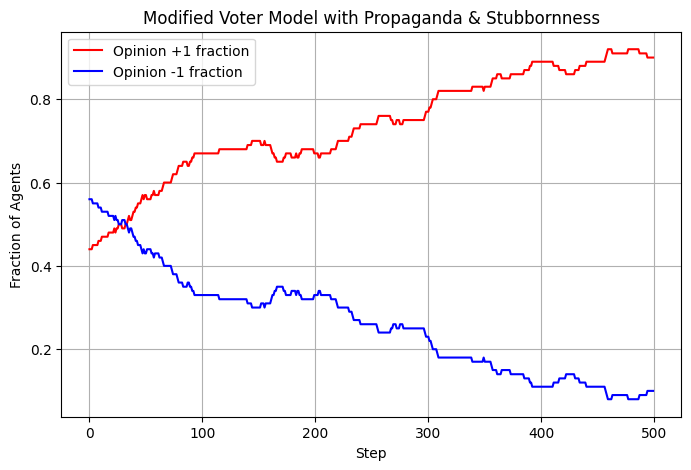

In [ ]:
N = 100
p = 0.05
alpha = 0.3     # Probability that an agent is 'convinced' by external propaganda each step
max_steps = 500
seed = 42

# ER model
opinions_over_time = run_modified_voter_model(
    N=N, 
    p=p, 
    alpha=alpha, 
    max_steps=max_steps, 
    seed=seed
)


plot_opinion_evolution(opinions_over_time)